# **Libraries**

In [1]:
import numpy as np # numerical python
import matplotlib.pyplot as plt # collection of functions that make matplotlib work

# **Arrays and Variables**

In [2]:
# points
x = np.array([[2.2], [3.3], [4.4], [5.5], [6.6], [7.7]])
y = np.array([[-2.8], [-10.8], [-5.9], [21.4], [41.4], [9.1]])
p = 5.2

# degree of the polynomial
n = 2
gp = n + 1

b = 2 # b(n) = t(n)

# endline
ndln = '\n-------------------------------------------------------------------\n'

# **leastSquares**

*   *Form of Linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial.*

In [3]:
# impossible system coefficients matrix
X = x**0
for i in range(1, n + 1):
  X = np.concatenate((X, x**i), 1)

# assembling the possible and determined system
XtX = (X.T)@X
XtY = (X.T)@y

ac = np.linalg.solve(XtX, XtY) # solve the system and determine values of a0, a1 and a2

# **Lagrange method**

*   *Way to find a polynomial that takes on certain values at arbitrary points.*

g(5.2): [14.68]
-------------------------------------------------------------------


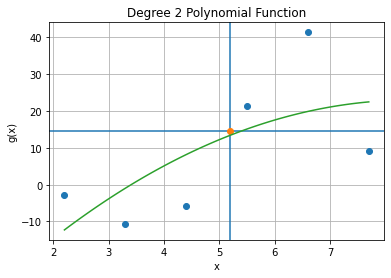

In [4]:
# best point definition matrices
resx = np.zeros((gp))
resy = np.zeros((gp))
minx = np.copy(x) - p
miny = np.copy(y)

# sets the three coordinates closest to the point
for i in range(gp):
  for j in range(len(x)):
    if abs(minx[j]) == np.min(abs(minx)):
      resx[i] = minx[j] + p
      resy[i] = miny[j]
      minx[j] = 1E50
      break

# Lagrange
def interpolacaoLagrange(x, y, p):
  size = len(resx)
  s = 0
  for i in range(size):
      L = 1
      for j in range(size):
        if i != j:
          L *= (p - resx[j])/(resx[i] - resx[j])
      s += L * resy[i]
  return s
  
s = interpolacaoLagrange(x, y, p)

# results
print(f'g({np.round(p, 4)}): [{np.round(s, 2)}]', end = ndln)

# graph coordinates
xg = np.linspace((np.min(x)), (np.max(x)), 100)
yg = 0
for i in range(n + 1):
  yg = yg + ((ac[i,0])*(xg**i))

# graph plot
plt.title(f'Degree {n} Polynomial Function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.axvline(p)
plt.axhline(s)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(p, s, 'o')
plt.plot(xg, yg)
plt.show()

# **Newton method**

*   *Technique used when the interval difference is not same for all sequence of values.*

f(5.2): [12.95]
-------------------------------------------------------------------
Divided differences:
[[-2.8       ]
 [-7.27272727]
 [ 5.33057851]
 [ 1.18958177]
 [-1.11558864]
 [ 0.12366683]]
-------------------------------------------------------------------
f(5.2) + b(2): [18.28]
-------------------------------------------------------------------


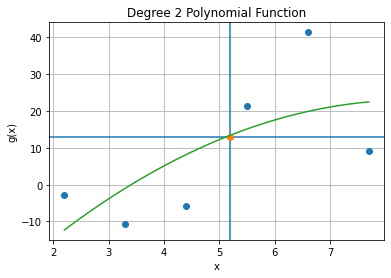

In [5]:
# divided differences method
size = len(y)
T = [item for item in y]
t = [y[0]] + [0] * (size - 1)
for i in range(size - 1):
  for j in range(size - 1 - i):
    T[j] = (T[j + 1] - T[j]) / (x[j + i + 1] - x[j])
  t[i + 1] = T[0]
t = np.copy(t)

# Newton
size = len(x)
s = 0
for i in range(size):
  L = 1
  for j in range(i):
    L *= (p - x[j])
  s += t[i] * L
  
# results
print(f'f({np.round(p, 4)}): {np.round(s, 2)}',
      f'Divided differences:\n{t}',
      f'f({np.round(p, 2)}) + b({b}): {np.round(s + t[b], 2)}',
      sep = ndln,
      end = ndln)

# graph coordinates
xg = np.linspace((np.min(x)), (np.max(x)), 100)
yg = 0
for i in range(n + 1):
  yg = yg + ((ac[i,0])*(xg**i))

# graph plot
plt.title(f'Degree {n} Polynomial Function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.axvline(p)
plt.axhline(s)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(p, s, 'o')
plt.plot(xg, yg)
plt.show()